In [340]:
import os
os.chdir('/Users/perinik/github.com/NikhilPeri/steel-defect-detection')
import numpy as np
import pandas as pd

from segmentation_models.losses import dice_loss
from keras import backend as K
import tensorflow as tf

tf.enable_eager_execution()
from matplotlib import pyplot as plt
%matplotlib inline

In [400]:
import glob
import re
pre_trained = glob.glob('./results/*PSPNet-144x912-seresnet18*/*.h5')

In [411]:
scores = [re.findall('best_model_(\d*\.?\d*)', p) for p in pre_trained]
scores = [ float(s[0]) if len(s) > 0 else 0.0 for s in scores]
scores = np.array(scores)
pre_trained = pre_trained[scores.argmax()]

In [412]:
pre_trained

'./results/model-architecture-PSPNet-144x912-seresnet18-batch16-SGD-lr0.01-dice_bce_loss/best_model_0.91151.h5'

In [378]:
re.findall('\d+\.\d+', '3.45')

['3.45']

In [370]:
pre_trained

['./results/model-architecture-FPN-128x800-seresnet34-batch16-SGD-lr0.005-dice_bce_loss/best_model.h5',
 './results/model-architecture-PSPNet-144x912-seresnet18-batch16-SGD-lr0.01-dice_bce_loss/best_model.h5',
 './results/model-architecture-Unet-128x800-resnet34-batch16-SGD-lr0.01-dice_bce_loss/best_model.h5',
 './results/model-architecture-Unet-128x800-resnet18-batch16-SGD-lr0.01-dice_bce_loss/best_model.h5',
 './results/model-architecture-PSPNet-240x1584-seresnet18-batch16-SGD-lr0.01-dice_bce_loss/best_model.h5',
 './results/model-architecture-PSPNet-144x912-resnet18-batch16-SGD-lr0.01-dice_bce_loss/best_model.h5',
 './results/model-architecture-PSPNet-144x912-resnet34-batch16-SGD-lr0.01-dice_bce_loss/best_model.h5',
 './results/model-architecture-PSPNet-240x1584-resnet18-batch16-SGD-lr0.01-dice_bce_loss/best_model_0.89727.h5',
 './results/model-architecture-FPN-128x800-seresnet18-batch16-SGD-lr0.005-dice_bce_loss/best_model.h5',
 './results/model-architecture-Unet-128x800-seresnet18

In [357]:
from utils.data import clean_training_samples, load_sample
samples = pd.read_csv('data/raw/train.csv')
samples = clean_training_samples(samples, 'data/raw/train_images/')

In [343]:
5043/samples.groupby('class').count()

,class_1_encoded_pixels,id,image_id,class_2_encoded_pixels,class_3_encoded_pixels,class_4_encoded_pixels,has_defect,class_1,class_2,class_3,class_4
class,,,,,,,,,,,
0,0.854456,0.854456,0.854456,0.854456,0.854456,0.854456,0.854456,0.854456,0.854456,0.854456,0.854456
1,5.622074,5.622074,5.622074,5.622074,5.622074,5.622074,5.622074,5.622074,5.622074,5.622074,5.622074
2,24.014286,24.014286,24.014286,24.014286,24.014286,24.014286,24.014286,24.014286,24.014286,24.014286,24.014286
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,9.773256,9.773256,9.773256,9.773256,9.773256,9.773256,9.773256,9.773256,9.773256,9.773256,9.773256


In [332]:
class_1_count = []
class_2_count = []
class_3_count = []
class_4_count = []
for i, sample in samples.iterrows():
    _, label = load_sample(sample)
    class_count = label.sum(axis=(0,1))
    class_1_count.append(class_count[0])
    class_2_count.append(class_count[1])
    class_3_count.append(class_count[2])
    class_4_count.append(class_count[3])
    
samples['class_1_count'] = pd.Series(class_1_count)
samples['class_2_count'] = pd.Series(class_2_count)
samples['class_3_count'] = pd.Series(class_3_count)
samples['class_4_count'] = pd.Series(class_4_count)


0it [00:00, ?it/s]
8it [00:00, 73.41it/s]
16it [00:00, 74.59it/s]
25it [00:00, 77.89it/s]
35it [00:00, 81.53it/s]
45it [00:00, 84.46it/s]
55it [00:00, 86.68it/s]
64it [00:00, 84.67it/s]
73it [00:00, 83.85it/s]
82it [00:00, 82.32it/s]
91it [00:01, 82.20it/s]
100it [00:01, 81.09it/s]
109it [00:01, 81.16it/s]
118it [00:01, 81.28it/s]
127it [00:01, 81.39it/s]
137it [00:01, 83.94it/s]
147it [00:01, 85.79it/s]
156it [00:01, 84.97it/s]
166it [00:01, 85.78it/s]
175it [00:02, 84.21it/s]
184it [00:02, 85.17it/s]
194it [00:02, 86.90it/s]
203it [00:02, 86.47it/s]
213it [00:02, 88.36it/s]
222it [00:02, 87.68it/s]
231it [00:02, 88.10it/s]
240it [00:02, 84.67it/s]
249it [00:02, 86.09it/s]
258it [00:03, 84.55it/s]
267it [00:03, 83.20it/s]
276it [00:03, 82.96it/s]
285it [00:03, 76.22it/s]
293it [00:03, 69.26it/s]
301it [00:03, 65.82it/s]
308it [00:03, 63.00it/s]
315it [00:03, 62.78it/s]
322it [00:04, 61.25it/s]
329it [00:04, 58.90it/s]
337it [00:04, 63.48it/s]
345it [00:04, 66.67it/s]
353it [00:04, 69

4946it [01:02, 56.74it/s]
4954it [01:02, 61.26it/s]
4962it [01:02, 64.82it/s]
4970it [01:02, 66.75it/s]
4979it [01:02, 70.42it/s]
4987it [01:02, 72.80it/s]
4995it [01:02, 73.93it/s]
5003it [01:02, 75.21it/s]
5011it [01:02, 76.27it/s]
5019it [01:02, 77.23it/s]
5027it [01:03, 77.57it/s]
5036it [01:03, 78.84it/s]
5045it [01:03, 78.88it/s]
5054it [01:03, 79.50it/s]
5062it [01:03, 77.64it/s]
5071it [01:03, 78.08it/s]
5079it [01:03, 78.36it/s]
5087it [01:03, 76.23it/s]
5095it [01:03, 76.70it/s]
5103it [01:04, 76.83it/s]
5111it [01:04, 77.40it/s]
5119it [01:04, 76.94it/s]
5127it [01:04, 77.38it/s]
5135it [01:04, 76.29it/s]
5143it [01:04, 76.98it/s]
5151it [01:04, 77.69it/s]
5159it [01:04, 77.44it/s]
5167it [01:04, 77.38it/s]
5175it [01:05, 76.28it/s]
5184it [01:05, 77.63it/s]
5192it [01:05, 77.10it/s]
5201it [01:05, 78.50it/s]
5210it [01:05, 77.25it/s]
5218it [01:05, 76.37it/s]
5226it [01:05, 75.48it/s]
5235it [01:05, 77.39it/s]
5243it [01:05, 78.16it/s]
5251it [01:05, 78.66it/s]
5259it [01:0

9481it [02:03, 77.31it/s]
9489it [02:03, 77.47it/s]
9498it [02:03, 78.68it/s]
9506it [02:03, 77.51it/s]
9514it [02:03, 76.95it/s]
9522it [02:04, 76.68it/s]
9530it [02:04, 76.73it/s]
9538it [02:04, 75.34it/s]
9547it [02:04, 77.54it/s]
9555it [02:04, 78.06it/s]
9564it [02:04, 78.84it/s]
9572it [02:04, 78.13it/s]
9580it [02:04, 77.42it/s]
9588it [02:04, 77.60it/s]
9596it [02:04, 77.12it/s]
9604it [02:05, 77.82it/s]
9613it [02:05, 78.47it/s]
9621it [02:05, 76.94it/s]
9629it [02:05, 74.69it/s]
9637it [02:05, 67.69it/s]
9644it [02:05, 61.47it/s]
9651it [02:05, 60.55it/s]
9658it [02:05, 59.70it/s]
9665it [02:06, 59.52it/s]
9672it [02:06, 57.70it/s]
9678it [02:06, 58.35it/s]
9686it [02:06, 61.75it/s]
9694it [02:06, 65.52it/s]
9701it [02:06, 66.55it/s]
9709it [02:06, 69.34it/s]
9717it [02:06, 70.97it/s]
9726it [02:06, 73.41it/s]
9734it [02:07, 74.21it/s]
9742it [02:07, 74.42it/s]
9750it [02:07, 74.63it/s]
9758it [02:07, 75.03it/s]
9767it [02:07, 76.44it/s]
9775it [02:07, 76.20it/s]
9783it [02:0

In [333]:
samples['class_1_count'] = pd.Series(class_1_count)
samples['class_2_count'] = pd.Series(class_2_count)
samples['class_3_count'] = pd.Series(class_3_count)
samples['class_4_count'] = pd.Series(class_4_count)

In [335]:
10447 / samples[['class_1_count', 'class_2_count', 'class_3_count', 'class_4_count']].mean()

class_1_count     33.561750
class_2_count    157.342671
class_3_count      0.999931
class_4_count      4.768647
dtype: float64

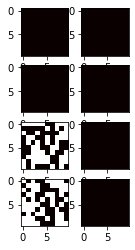

In [304]:
y_pred = np.ones((7, 10, 10, 4))
y_true = np.concatenate([
    np.ones((7, 10, 10, 1)),
    np.zeros((7, 10, 10, 1)),
    np.random.randint(0, 2, size=(7, 10, 10, 2)),
], axis=-1)

fig = plt.figure(figsize=(2, 4))
for i in range(4):
    fig.add_subplot(4, 2, 2*i+1)
    plt.imshow(y_true[1, :, :, i], cmap='hot')
    fig.add_subplot(4, 2, 2*i+2)
    plt.imshow(y_pred[1, :, :, i], cmap='hot')
plt.show()

In [336]:
weights = K.constant(np.array([33., 157., 1., 5.]))
y_pred = K.variable(y_pred)
y_true = K.variable(y_true)

In [337]:
dice_loss(y_pred, y_true)

<tf.Tensor: id=3637, shape=(), dtype=float32, numpy=0.41234535>

In [338]:
def generalized_dice(pred, true):
    #numerator = K.sum(weights*K.sum(y_pred * y_true, axis=(0,1,2)))
    #denomenator = K.sum(weights*K.sum(y_pred + y_true, axis=(0,1,2))) + K.epsilon()
    numerator = 2 * K.sum(y_true * y_pred, axis=(0,1,2))
    denominator = K.sum(y_true + y_pred, axis=(0,1,2))
    return K.mean(weights*(1 - numerator / denominator))

In [339]:
generalized_dice(y_pred, y_true)

<tf.Tensor: id=3656, shape=(), dtype=float32, numpy=39.750973>